In [10]:
import numpy as np
from sklearn.linear_model import Ridge

In [55]:
import matplotlib.pyplot as plt

In [41]:
nn = 10000

In [42]:
X = np.random.randn(nn,5)

In [82]:
w1 = np.array([1,-1,0.5,0,-0.5])
w2 = np.array([-1,-2,0.5,1,0])
w3 = np.array([3,-2,1,-1,-.5])

In [46]:
Y = np.hstack((X[:5000,:].dot(w1), X[5000:7000,:].dot(w2), X[7000:,:].dot(w3)))

In [47]:
Y += np.random.randn(nn)

In [48]:
LR = Ridge().fit(X,Y)

In [49]:
LR.coef_

array([ 1.24727045, -1.51227001,  0.65575552, -0.0934864 , -0.22090421])

In [64]:
mm = 50

In [65]:
W = np.empty((nn-mm,5))

for ii in range(nn-mm):
    xx = X[ii:ii+mm,:]
    yy = Y[ii:ii+mm]
    LR = Ridge().fit(xx,yy)
    W[ii,:] = LR.coef_
        

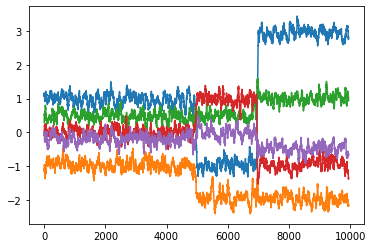

In [66]:
plt.plot(W)

filtro

In [83]:
X = np.random.randn(5)
Y = np.zeros(nn+5)
Y[:5]=X
Y[5] = X.dot(w1) 

In [84]:
for ii in range(6,nn+5):
    Y[ii] = Y[ii-5:ii].dot(w1)

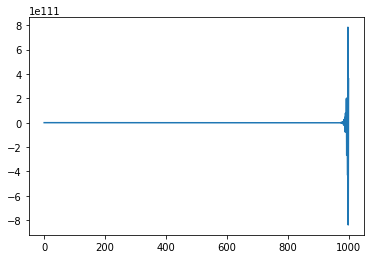

In [85]:
plt.plot(Y[:1000])

In [80]:
Y.shape

(10005,)

In [73]:
X

array([ 0.21648055, -0.60605744,  0.91668821,  0.7534756 , -1.39026305])

In [74]:
X.dot(w1)

1.5589347043952457

In [75]:
Y[:5]

array([0., 0., 0., 0., 0.])

In [86]:
from scipy import signal

In [106]:
X = np.random.randn(nn) # ruido blanco
Y = signal.lfilter([1], np.array([1, -.8, 0.2, -.3]), X)

Esta señal sigue el modelo

$$
y[n] = 0.8 y[n-1] -0.2 y[n-2] + 0.3 y[n-3] + r[n]
$$

donde $r[n]$ es ruido blanco

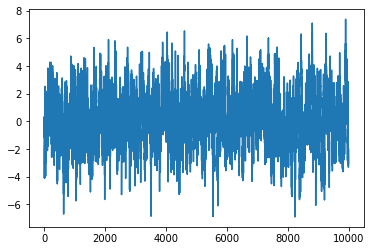

In [102]:
plt.plot(Y)

Para recuperar los coeficientes del filtro $[0.8, -0.2, 0.3]$ tengo que construir una matriz `xx` donde la primera columna sea $y[n-1]$, la segunda columna sea $y[n-2]$ , la tercera columna sea $y[n-3]$. Además voy a añadir una cuarta columna por la cara. Como según el modelo real $y[n]$ no depende de $y[n-4]$ el peso de la cuarta columna deberá ser pequeño 

In [108]:
xx = np.zeros((nn-4,4))
xx[:,0] = Y[3:nn-1] #y[n-1] como la primera muestra que voy a predecir es y[4], 
                    # y[n-1] será y[3]

xx[:,1] = Y[2:nn-2] # y[n-2] como la primera muestra que voy a predecir es y[4], 
                    # y[n-2] será y[2]

xx[:,2] = Y[1:nn-3]# y[n-3] como la primera muestra que voy a predecir es y[4], 
                    # y[n-3] será y[1]
    
    
xx[:,3] = Y[:nn-4] # además by the face añado una cuarta columna, y[n-4] como 
                   # el modelo real no depende de y[n-4] el cuarto coeficiente 
                   # deberá ser 0 (o muy pequeño)




In [109]:
LR = Ridge().fit(xx,Y[4:])

In [110]:
LR.coef_

array([ 0.8020133 , -0.21665245,  0.3103578 ,  0.00466233])

ahora lo haces con ventanas

In [119]:
mm = 500 # tamaño de la ventana
W = np.empty((nn-4-mm,4))

for ii in range(nn-mm-4):
    xxx = xx[ii:ii+mm,:]
    yy = Y[4+ii:4+ii+mm]
    LR = Ridge().fit(xxx,yy)
    W[ii,:] = LR.coef_

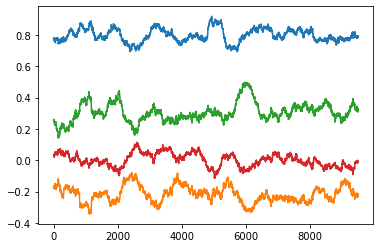

In [120]:
plt.plot(W)

prueba con más tamaños de ventana

In [122]:
X.shape

(10000,)

hora metemos 3 procesos

In [124]:
Y = np.hstack((signal.lfilter([1], np.array([1, -.8, 0.2, -.3]), X[:5000]),
               signal.lfilter([1], np.array([1, .2, 0.1, -.4]), X[5000:7500]),
               signal.lfilter([1], np.array([1, 0, 0.3, -.3]), X[7500:])))

In [131]:
mm = 200 # tamaño de la ventana
W = np.empty((nn-4-mm,4))

for ii in range(nn-mm-4):
    xxx = xx[ii:ii+mm,:]
    yy = Y[4+ii:4+ii+mm]
    LR = Ridge().fit(xxx,yy)
    W[ii,:] = LR.coef_

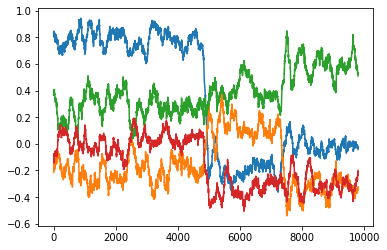

In [132]:
plt.plot(W)

En teoría

- La curva azul tiene que hacer 0.8, en 5000 cambiar a -0.2 y en 7500 cambiar a 0
- La curva naranja tiene que hacer -0.2, en 5000 cambiar a -0.1 y  en 7500 cambiar a -0.3
- La curva verde tiene que hacer 0.3, en 5000 cambiar a 0.4 y en 7500 volver a 0.3
- La curva roja tiene que estar en 0 todo el rato

Pero supongo que se dan correlaciones entre pesos y por eso no todos salen así

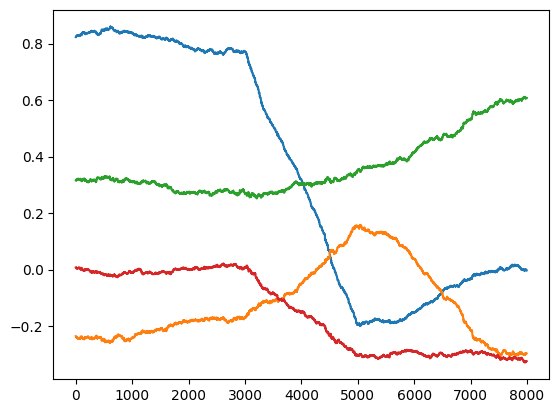

In [42]:
mm = 2000 # tamaño de la ventana
W = np.empty((nn-4-mm,4))

for ii in range(nn-mm-4):
    xxx = xx[ii:ii+mm,:]
    yy = Y[4+ii:4+ii+mm]
    LR = Ridge().fit(xxx,yy)
    W[ii,:] = LR.coef_
    
plt.plot(W)